In [49]:
import pytesseract
import cv2
from PIL import Image
import numpy as np
import imutils
from imutils import contours
import matplotlib.pyplot as plt
%matplotlib inline

30/01/1997
wearer Signature
ELWPM8089J


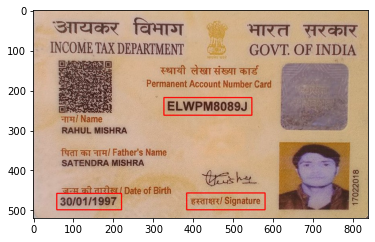

In [68]:
img = cv2.imread("C:\\Users\\snsha\\Downloads\\img.jpg")
img1 = cv2.imread("C:\\Users\\snsha\\Downloads\\img1.jpg")
images = [img,img1]
for img in images:
    img = imutils.resize(img, height = 519, width=838)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    copy = img
    rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 5))
    sqKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, rectKernel) 
    gradx = cv2.Sobel(blackhat, ddepth=cv2.CV_32F, dx=1, dy=0,ksize=-1)
    gradx = np.absolute(gradx)
    (minVal, maxVal) = (np.min(gradx), np.max(gradx))
    gradx = (255 * ((gradx - minVal) / (maxVal - minVal)))
    gradx = gradx.astype("uint8")
    gradx = cv2.morphologyEx(gradx, cv2.MORPH_CLOSE, rectKernel)
    thresh = cv2.threshold(gradx, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, sqKernel)
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    locs = []
    for (i, c) in enumerate(cnts):
        if  cv2.contourArea(c) > 1000:
            (x, y, w, h) = cv2.boundingRect(c)
            ar = w / float(h)
            if ar > 5.5 and ar<9.1:
                locs.append((x, y, w, h))
    for x,y,w,h in locs:
        image = cv2.rectangle(copy, (x-10, y-10), (x+w+10, y+h+10), (255, 0, 0), 2)
    plt.imshow(image, cmap = 'gray')
    for x,y,w,h in locs:
        body = gray[y-10:y+h+10, x-10:x+w+10]
       
        text = pytesseract.image_to_string(body)
        print(text)
    break